<a href="https://colab.research.google.com/github/CUNY-SPS-Data-Science-Program/your-bio-mianshariq/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
!pip install 'geoplot'

In [196]:
import re
import csv
import json
from time import sleep
from bs4 import BeautifulSoup
import requests
import pandas as pd
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

In [346]:
def extract_salary_info(job_title, job_city):
  """Extract and return salary information"""
  template = 'https://www.salary.com/research/salary/listing/{}-salary/{}'
  url = template.format (job_title, job_city)
  try:
    response = requests.get(url)
    if response.status_code != 200:
      return None
  except requests.exceptions.ConnectionError:
    return None
  soup = BeautifulSoup(response. text, 'html.parser')
  pattern = re.compile(r'Occupation')
  script = soup.find('script', {'type':'application/ld+json'}, text = pattern)
  json_raw = script.contents[0]
  json_data = json.loads(json_raw)

  job_title = json_data['name']
  location = json_data['occupationLocation'][0]['name']
  description = json_data['description']

  ntile_10 = json_data['estimatedSalary'][0]['percentile10']
  ntile_25 = json_data['estimatedSalary'][0]['percentile25']
  ntile_50 = json_data['estimatedSalary'][0]['median']
  ntile_75 = json_data['estimatedSalary'][0]['percentile75']
  ntile_90 = json_data['estimatedSalary'][0]['percentile90']

  salary_data = (job_title, location, description, ntile_10, ntile_25, ntile_50, ntile_75, ntile_90)
  return salary_data

In [347]:
def main(job_title):
    """Extract salary data from top us cities"""

    # get the list of us states
    states = pd.read_csv('https://github.com/mianshariq/Datasets/raw/33be05ad7fc18499594c724479b3c4cf8c268593/title_data.csv')

    states = states['Abbreviation'].tolist()

    # extract salary data for each state
    salary_data = []
    for state in states:
        result = extract_salary_info(job_title, state)
        if result:
            salary_data.append(result)
            sleep(0.5)

    # save data to csv file
    with open('salary-results.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Title','Location', 'Description', 'nTile10', 'nTile25', 'nTile50', 'nTile75', 'nTile90'])
        writer.writerows(salary_data)

    return salary_data

In [348]:
data_scientist = main('data-scientist')
data_analyst = main('data-analyst')
data_engineer = main('data-engineer')
arch = main('data-architect')
business = main('business-analyst')
ml_engineer = main('machine-learning-engineer')

<ipython-input-346-a9134d28679d>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script = soup.find('script', {'type':'application/ld+json'}, text = pattern)
<ipython-input-346-a9134d28679d>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script = soup.find('script', {'type':'application/ld+json'}, text = pattern)
<ipython-input-346-a9134d28679d>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script = soup.find('script', {'type':'application/ld+json'}, text = pattern)
<ipython-input-346-a9134d28679d>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script = soup.find('script', {'type':'application/ld+json'}, text = pattern)
<ipython-input-346-a9134d28679d>:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

In [350]:
columns = ['Title','Location', 'Description', 'nTile10', 'nTile25', 'nTile50', 'nTile75', 'nTile90']

# Create the Pandas DataFrame
df_data_scientist = pd.DataFrame(data_scientist, columns=columns)
df_data_analyst = pd.DataFrame(data_analyst, columns=columns)
df_data_engineer = pd.DataFrame(bi, columns=columns)
df_arch = pd.DataFrame(arch, columns=columns)
df_business_analyst = pd.DataFrame(business, columns=columns)
df_ml_engineer = pd.DataFrame(ml_engineer, columns=columns)


# Display the DataFrame
result_df = pd.concat([df_data_scientist, df_data_analyst, df_data_engineer, df_arch,  df_business_analyst,df_ml_engineer])

# Reset the index if needed
result_df = result_df.reset_index(drop=True)

In [351]:
result_df

,Title,Location,Description,nTile10,nTile25,nTile50,nTile75,nTile90
0,Data Scientist,Alaska,,127015,141176,156729,172349,186569
1,Data Scientist,Maine,,112230,124742,138485,152286,164851
2,Data Scientist,Vermont,,112114,124613,138341,152128,164680
3,Data Scientist,New Hampshire,,117958,131109,145553,160058,173265
4,Data Scientist,Washington,,124908,138834,154129,169489,183474
...,...,...,...,...,...,...,...,...
250,Business Analyst,Alabama,,61926,68502,75725,84014,91561
251,Business Analyst,Georgia,,65406,72352,79980,88736,96707
252,Business Analyst,Hawaii,,70723,78233,86481,95948,104567
253,Business Analyst,Texas,,66260,73296,81025,89894,97970


In [352]:
data=gpd.read_file('https://github.com/mianshariq/Datasets/raw/dd792f49b511bdb836371df436cdb05b5730667a/gz_2010_us_040_00_500k_V2.json')
data.rename(columns={'NAME': 'State'}, inplace=True)
result_df.rename(columns={'Location': 'State'}, inplace=True)


In [353]:
gdf = data.merge(result_df, on='State', how='inner')

In [354]:
import pandas as pd

# Convert the column to numeric (integer or float)
gdf['nTile50'] = gdf['nTile50'].str.replace(',', '').astype(int)

# Format the column as currency without a currency symbol and zero decimal places
gdf['median_salary'] = gdf['nTile50'].apply(lambda x: f"${x:,.0f}")


In [355]:
gdf[gdf['State']=='Alaska']

,GEO_ID,STATE,State,LSAD,CENSUSAREA,geometry,Title,Description,nTile10,nTile25,nTile50,nTile75,nTile90,median_salary
90,0400000US02,02,Alaska,,570640.95,"MULTIPOLYGON (((-164.97620 54.13459, -164.9377...",Data Scientist,,127015,141176,156729,172349,186569,"$156,729"
91,0400000US02,02,Alaska,,570640.95,"MULTIPOLYGON (((-164.97620 54.13459, -164.9377...",Data Analyst,,73316,82077,91700,102596,112517,"$91,700"
92,0400000US02,02,Alaska,,570640.95,"MULTIPOLYGON (((-164.97620 54.13459, -164.9377...",Data Engineer,,93695,109340,126524,145334,162460,"$126,524"
93,0400000US02,02,Alaska,,570640.95,"MULTIPOLYGON (((-164.97620 54.13459, -164.9377...",Data Architect,,111010,125499,141413,158698,174434,"$141,413"
94,0400000US02,02,Alaska,,570640.95,"MULTIPOLYGON (((-164.97620 54.13459, -164.9377...",Business Analyst,,73540,81349,89927,99771,108733,"$89,927"


In [356]:
median_by_data_scientist=gdf[gdf['Title']=='Data Scientist']

<ipython-input-357-17619f4f57be>:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(median_by_data_scientist.geometry.centroid.x, median_by_data_scientist.geometry.centroid.y, median_by_data_scientist['median_salary']):


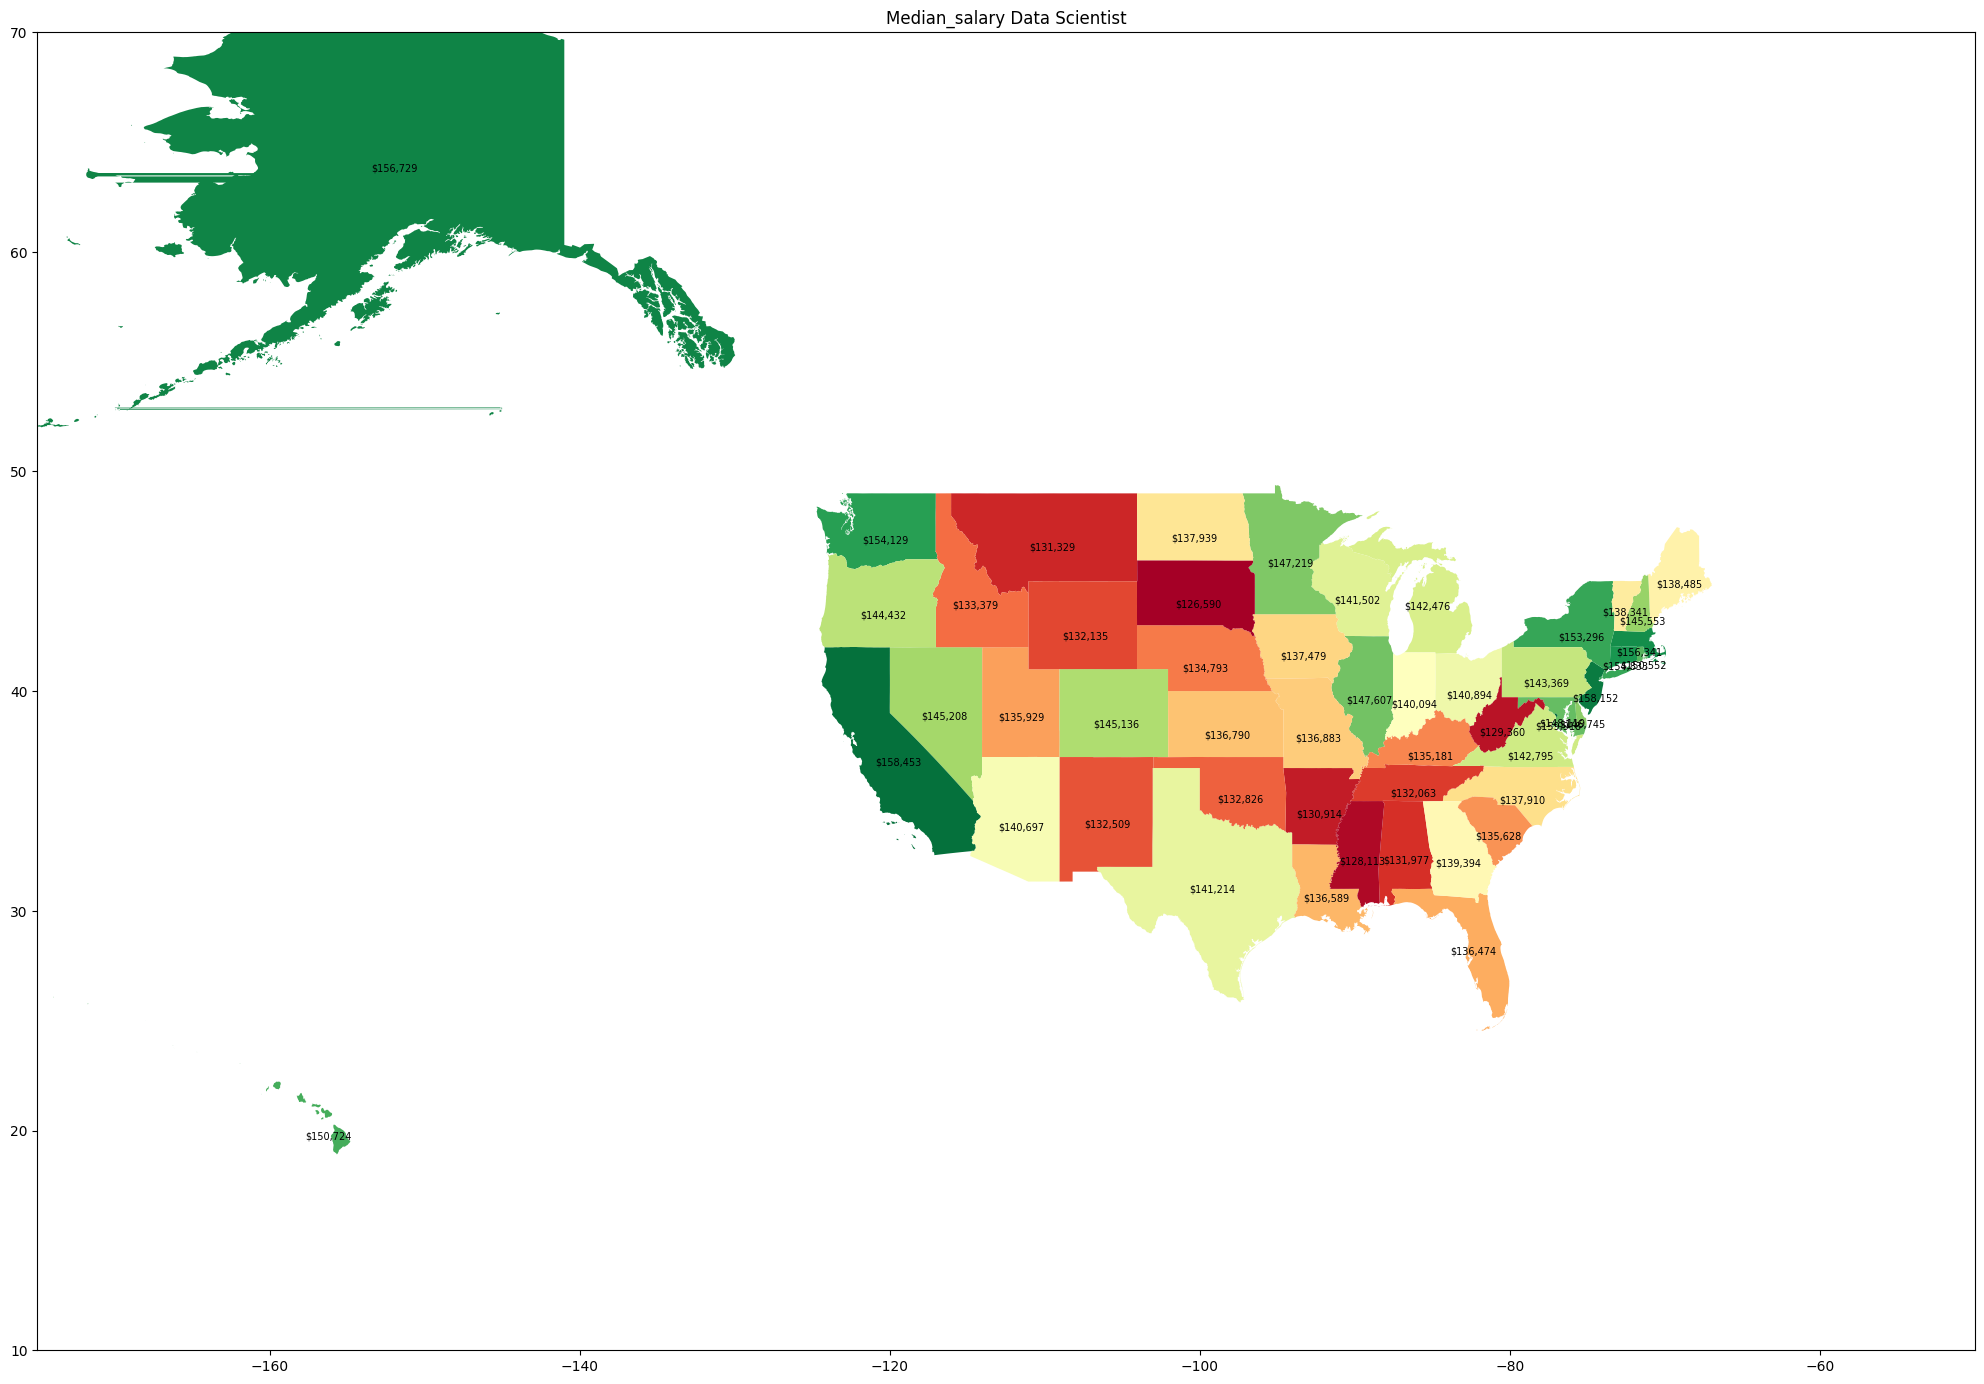

In [357]:
# Plot the GeoDataFrame with population as a color map.
fig, ax = plt.subplots(1, 1, figsize=(25, 25))
median_by_data_scientist.plot(column='median_salary', cmap='RdYlGn', legend=False, ax=ax, legend_kwds={'shrink': 0.3})
# Set the limits of the axes to zoom in on a specific region (adjust the values as needed)
ax.set_xlim(-175, -50)  # Set the x-axis limits
ax.set_ylim(10, 70)  # Set the y-axis limits
ax.set_title('Median_salary Data Scientist')
plt.axis('on')
for x, y, label in zip(median_by_data_scientist.geometry.centroid.x, median_by_data_scientist.geometry.centroid.y, median_by_data_scientist['median_salary']):
    ax.annotate(label, xy=(x, y), xytext=(-15, -10), textcoords='offset points', fontsize=7)
plt.show()


In [358]:
average_salary = gdf.groupby(['Title', 'State'])['nTile50'].mean().reset_index()

In [359]:
average_salary

,Title,State,nTile50
0,Business Analyst,Alabama,75725.0
1,Business Analyst,Alaska,89927.0
2,Business Analyst,Arizona,80728.0
3,Business Analyst,Arkansas,75115.0
4,Business Analyst,California,90916.0
...,...,...,...
250,Data Scientist,Virginia,142795.0
251,Data Scientist,Washington,154129.0
252,Data Scientist,West Virginia,129360.0
253,Data Scientist,Wisconsin,141502.0


In [360]:
gdf.dtypes

GEO_ID             object
STATE              object
State              object
LSAD               object
CENSUSAREA        float64
geometry         geometry
Title              object
Description        object
nTile10            object
nTile25            object
nTile50             int64
nTile75            object
nTile90            object
median_salary      object
dtype: object

In [361]:
median_by_state=gdf.groupby('State').mean('nTile50')

In [362]:
median_by_state

,CENSUSAREA,nTile50
State,,
Alabama,50645.326,102108.4
Alaska,570640.950,121258.6
Arizona,113594.084,108854.8
Arkansas,52035.477,101286.0
California,155779.220,122592.2
Colorado,103641.888,112289.2
Connecticut,4842.355,119791.2
Delaware,1948.543,113534.0
District of Columbia,61.048,123725.8


In [363]:
median_by_state = median_by_state.merge(data, on='State', how='inner')

In [364]:
median_by_state=gpd.GeoDataFrame(median_by_state, geometry='geometry')

In [365]:
median_by_state

,State,CENSUSAREA_x,nTile50,GEO_ID,STATE,LSAD,CENSUSAREA_y,geometry
0,Alabama,50645.326,102108.4,0400000US01,01,,50645.326,"MULTIPOLYGON (((-85.00237 31.00068, -85.02411 ..."
1,Alaska,570640.950,121258.6,0400000US02,02,,570640.950,"MULTIPOLYGON (((-164.97620 54.13459, -164.9377..."
2,Arizona,113594.084,108854.8,0400000US04,04,,113594.084,"POLYGON ((-109.04522 36.99908, -109.04524 36.9..."
3,Arkansas,52035.477,101286.0,0400000US05,05,,52035.477,"POLYGON ((-94.55929 36.49950, -94.51948 36.499..."
4,California,155779.220,122592.2,0400000US06,06,,155779.220,"MULTIPOLYGON (((-122.44632 37.86105, -122.4385..."
5,Colorado,103641.888,112289.2,0400000US08,08,,103641.888,"POLYGON ((-102.04224 36.99308, -102.05450 36.9..."
6,Connecticut,4842.355,119791.2,0400000US09,09,,4842.355,"MULTIPOLYGON (((-71.85957 41.32240, -71.86823 ..."
7,Delaware,1948.543,113534.0,0400000US10,10,,1948.543,"MULTIPOLYGON (((-75.55945 39.62981, -75.55910 ..."
8,District of Columbia,61.048,123725.8,0400000US11,11,,61.048,"POLYGON ((-77.03860 38.79151, -77.03890 38.800..."
9,Florida,53624.759,105587.2,0400000US12,12,,53624.759,"MULTIPOLYGON (((-85.15641 29.67963, -85.13740 ..."


In [366]:
# Convert the column to numeric (integer or float)
#median_by_state['median_salary'] = median_by_state['nTile50'].str.replace(',', '').astype(int)

# Format the column as currency without a currency symbol and zero decimal places
median_by_state['median_salary'] = median_by_state['nTile50'].apply(lambda x: f"${x:,.0f}")

In [367]:
median_by_state.dtypes

State              object
CENSUSAREA_x      float64
nTile50           float64
GEO_ID             object
STATE              object
LSAD               object
CENSUSAREA_y      float64
geometry         geometry
median_salary      object
dtype: object

<ipython-input-368-0cac84030ef1>:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(median_by_state.geometry.centroid.x, median_by_state.geometry.centroid.y, median_by_state['median_salary']):


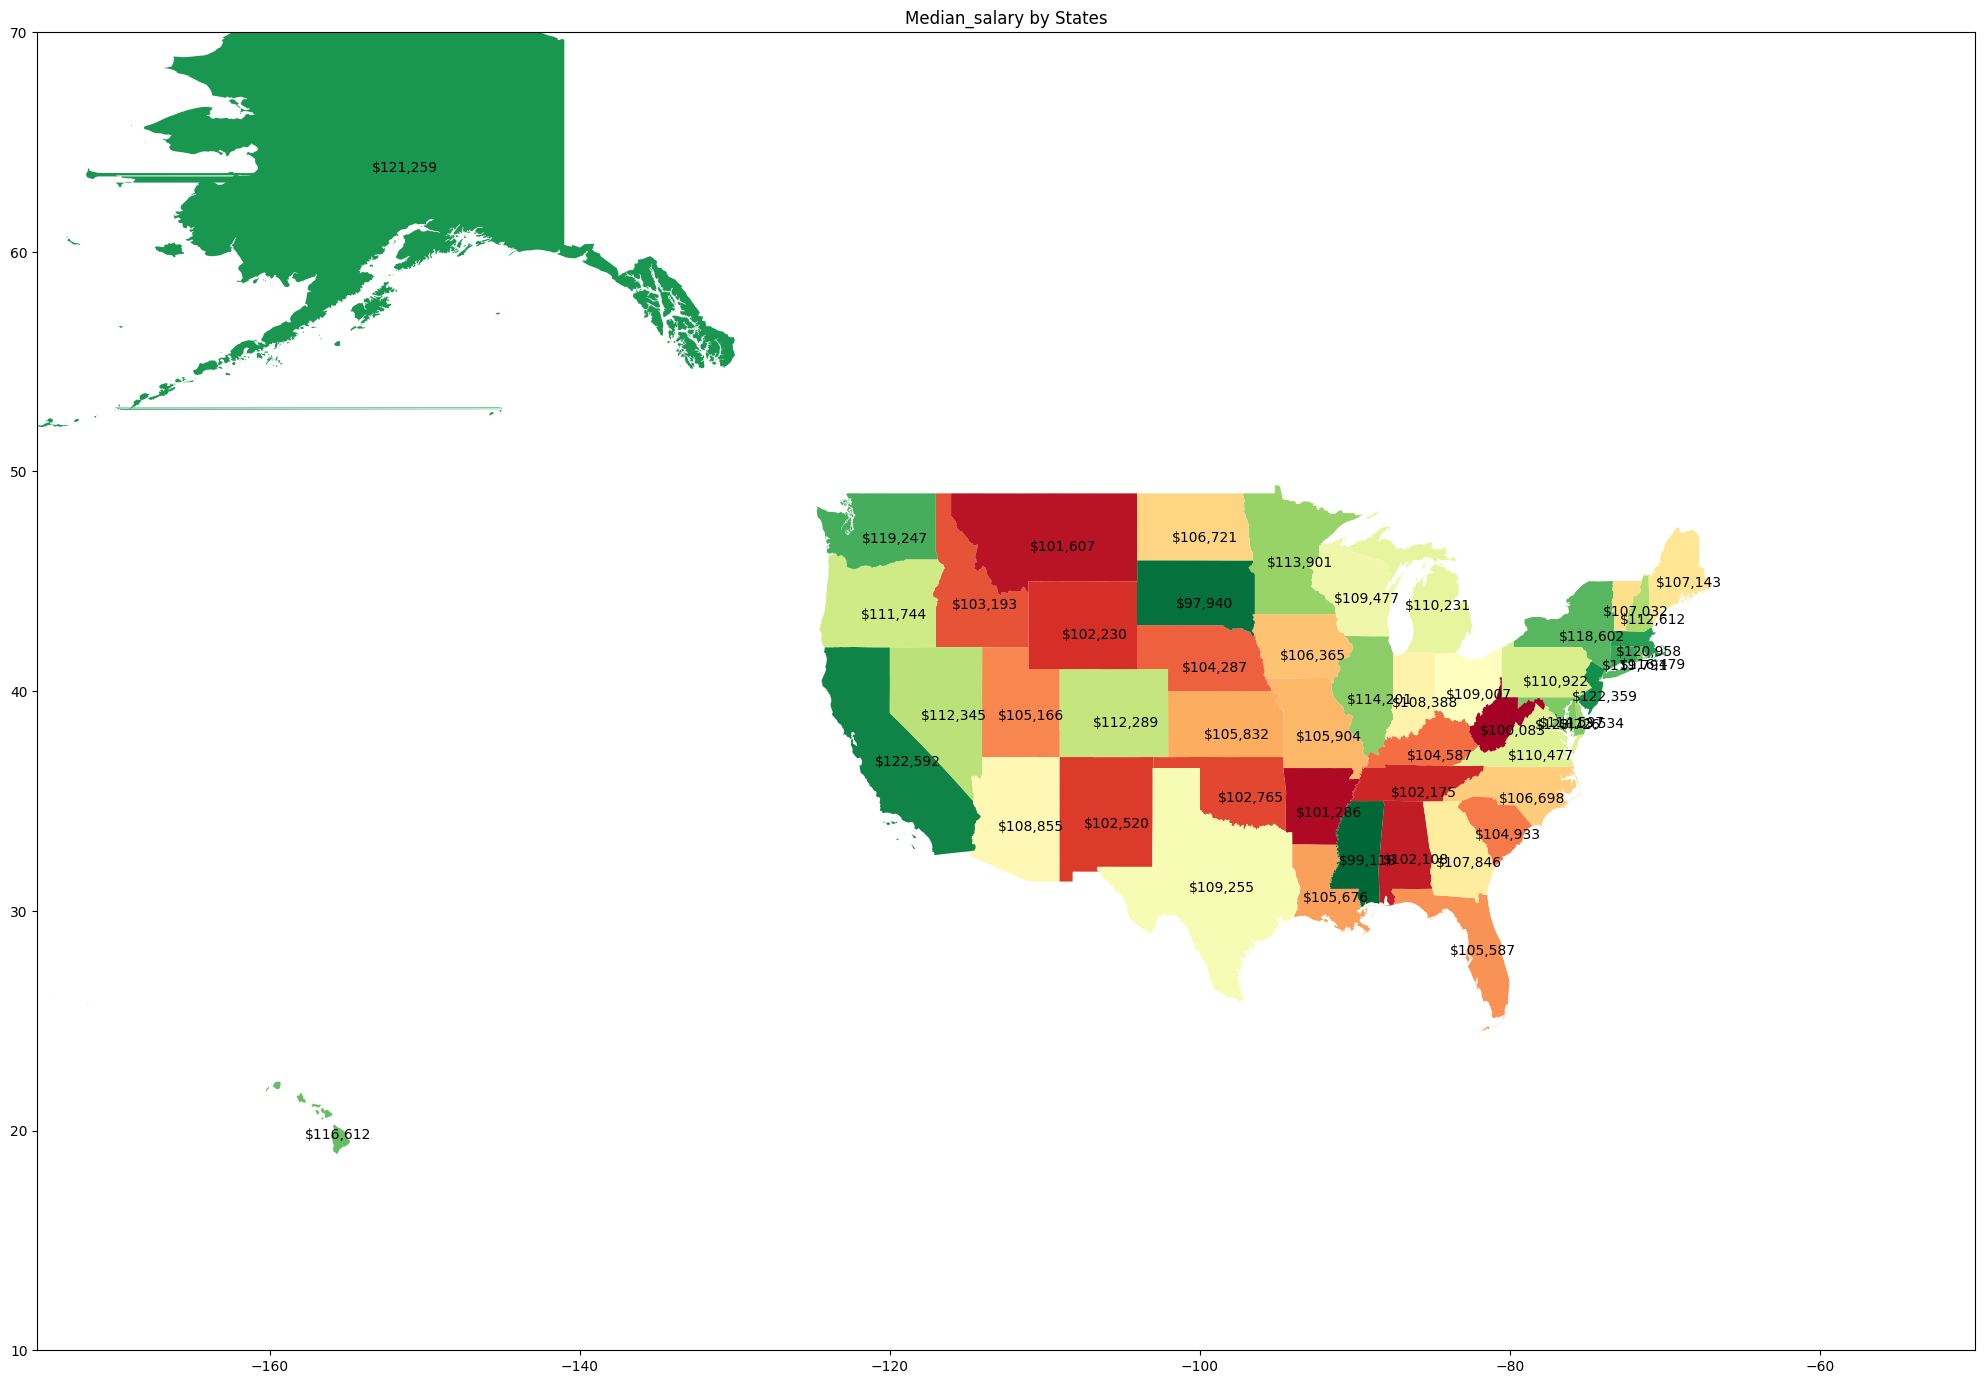

In [368]:
# Plot the GeoDataFrame with population as a color map.
fig, ax = plt.subplots(1, 1, figsize=(25, 25))
median_by_state.plot(column='median_salary', cmap='RdYlGn', legend=False, ax=ax)
# Set the limits of the axes to zoom in on a specific region (adjust the values as needed)
ax.set_xlim(-175, -50)  # Set the x-axis limits
ax.set_ylim(10, 70)  # Set the y-axis limits
ax.set_title('Median_salary by States')
plt.axis('on')
for x, y, label in zip(median_by_state.geometry.centroid.x, median_by_state.geometry.centroid.y, median_by_state['median_salary']):
    ax.annotate(label, xy=(x, y), xytext=(-15, -10), textcoords='offset points', fontsize=10)
plt.show()


In [388]:
gdf.describe()

,CENSUSAREA,nTile50
count,255.000000,255.000000
mean,69253.047686,109456.152941
std,84849.970148,25037.654167
min,61.048000,72634.000000
25%,30842.923000,83073.000000
50%,53624.759000,113094.000000
75%,81758.717000,130933.500000
max,570640.950000,159918.000000


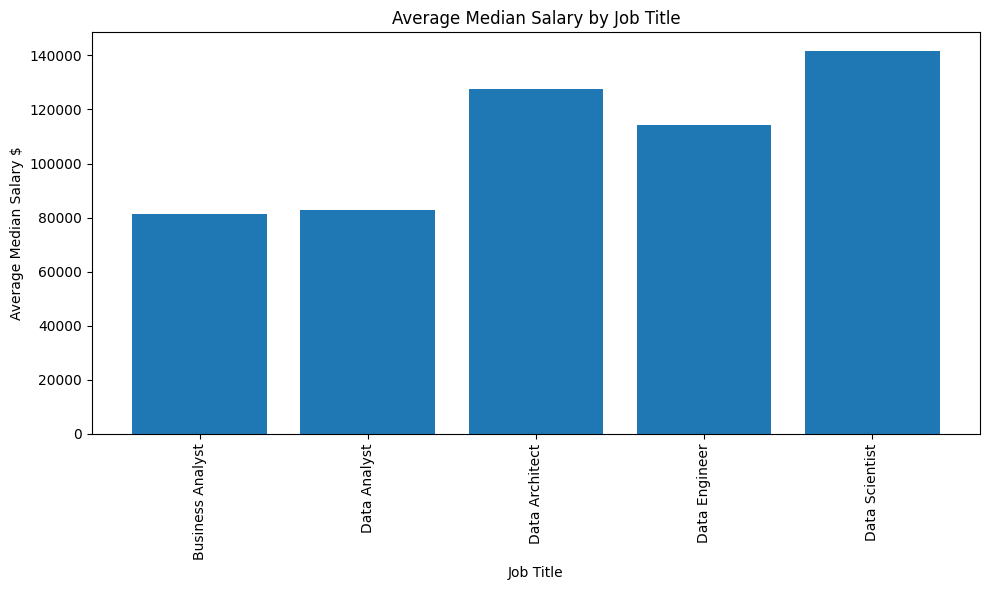

In [403]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Sample GeoDataFrame with Role, State, and Median Salary columns
# Replace with your actual data

# Group data by 'Role' and calculate the average salary
role_average_salary = gdf.groupby('Title')['nTile50'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(role_average_salary['Title'], role_average_salary['nTile50'])
plt.xlabel('Job Title')
plt.ylabel('Average Median Salary $')
plt.title('Average Median Salary by Job Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


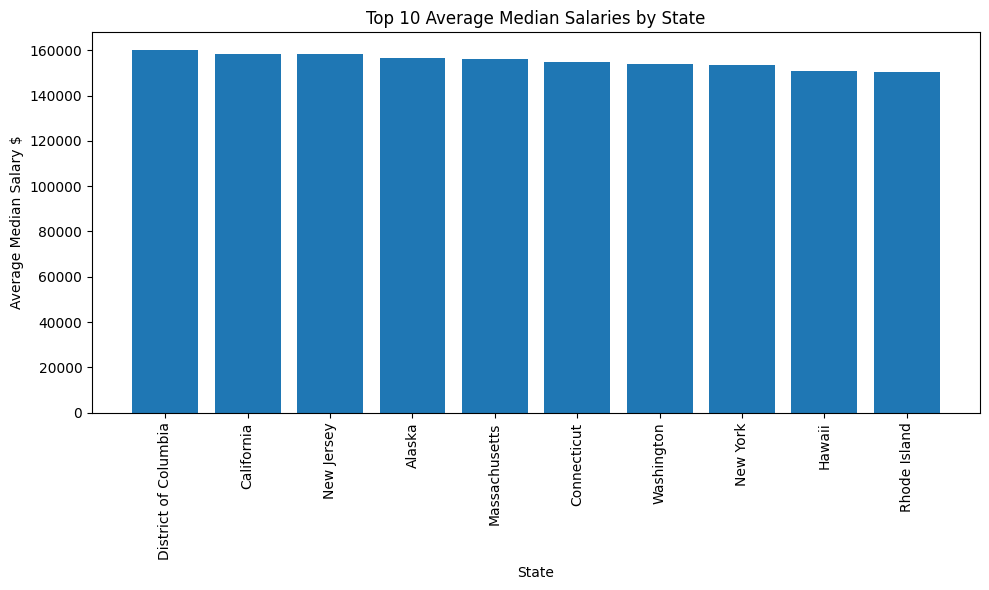

In [404]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Sample GeoDataFrame with Role, State, and Median Salary columns
# Replace with your actual data

# Group data by 'Role' and calculate the average salary
role_average_top10 = gdf.sort_values(['nTile50'], ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(role_average_top10['State'], role_average_top10['nTile50'])
plt.xlabel('State')
plt.ylabel('Average Median Salary $')
plt.title('Top 10 Average Median Salaries by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


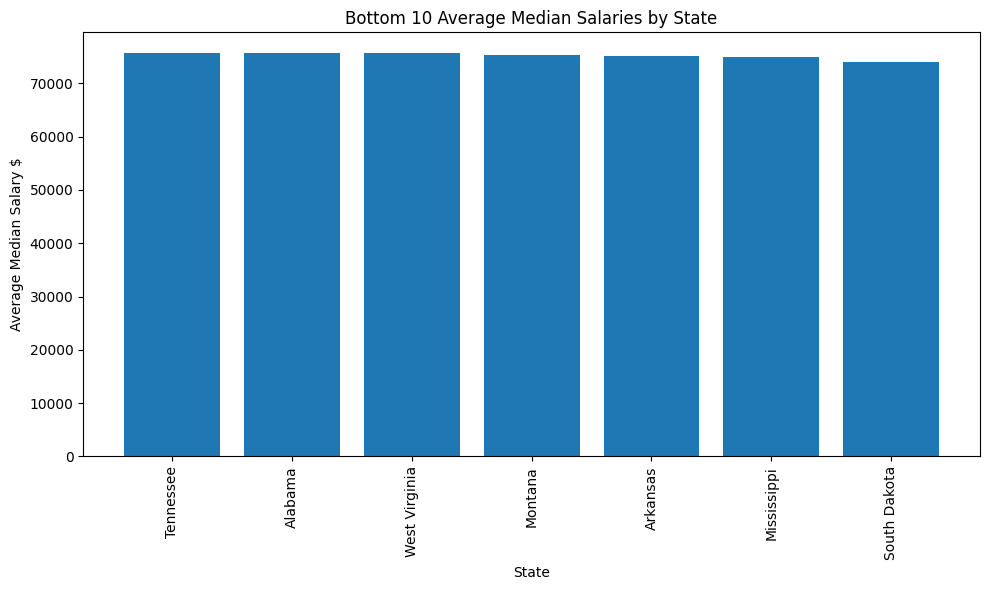

In [405]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Sample GeoDataFrame with Role, State, and Median Salary columns
# Replace with your actual data

# Group data by 'Role' and calculate the average salary
role_average_top10 = gdf.sort_values(['nTile50'], ascending=False).tail(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(role_average_top10['State'], role_average_top10['nTile50'])
plt.xlabel('State')
plt.ylabel('Average Median Salary $')
plt.title('Bottom 10 Average Median Salaries by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [333]:
gdf

,GEO_ID,STATE,State,LSAD,CENSUSAREA,geometry,Title,Description,nTile10,nTile25,nTile50,nTile75,nTile90,median_salary
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",Data Scientist,,112230,124742,138485,152286,164851,"$138,485"
1,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",Data Analyst,,64782,72523,81025,90653,99419,"$81,025"
2,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",Data Engineer,,82789,96612,111795,128416,143549,"$111,795"
3,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",Business Analyst,,64980,71880,79458,88157,96076,"$79,458"
4,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...",Data Scientist,,126701,140827,156341,171922,186107,"$156,341"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0400000US54,54,West Virginia,,24038.210,"POLYGON ((-81.96830 37.53780, -81.96540 37.541...",Business Analyst,,60698,67143,74223,82348,89745,"$74,223"
200,0400000US56,56,Wyoming,,97093.141,"POLYGON ((-109.05008 41.00066, -109.17368 41.0...",Data Scientist,,107084,119023,132135,145304,157293,"$132,135"
201,0400000US56,56,Wyoming,,97093.141,"POLYGON ((-109.05008 41.00066, -109.17368 41.0...",Data Analyst,,61811,69198,77310,86497,94861,"$77,310"
202,0400000US56,56,Wyoming,,97093.141,"POLYGON ((-109.05008 41.00066, -109.17368 41.0...",Data Engineer,,78993,92182,106669,122528,136967,"$106,669"


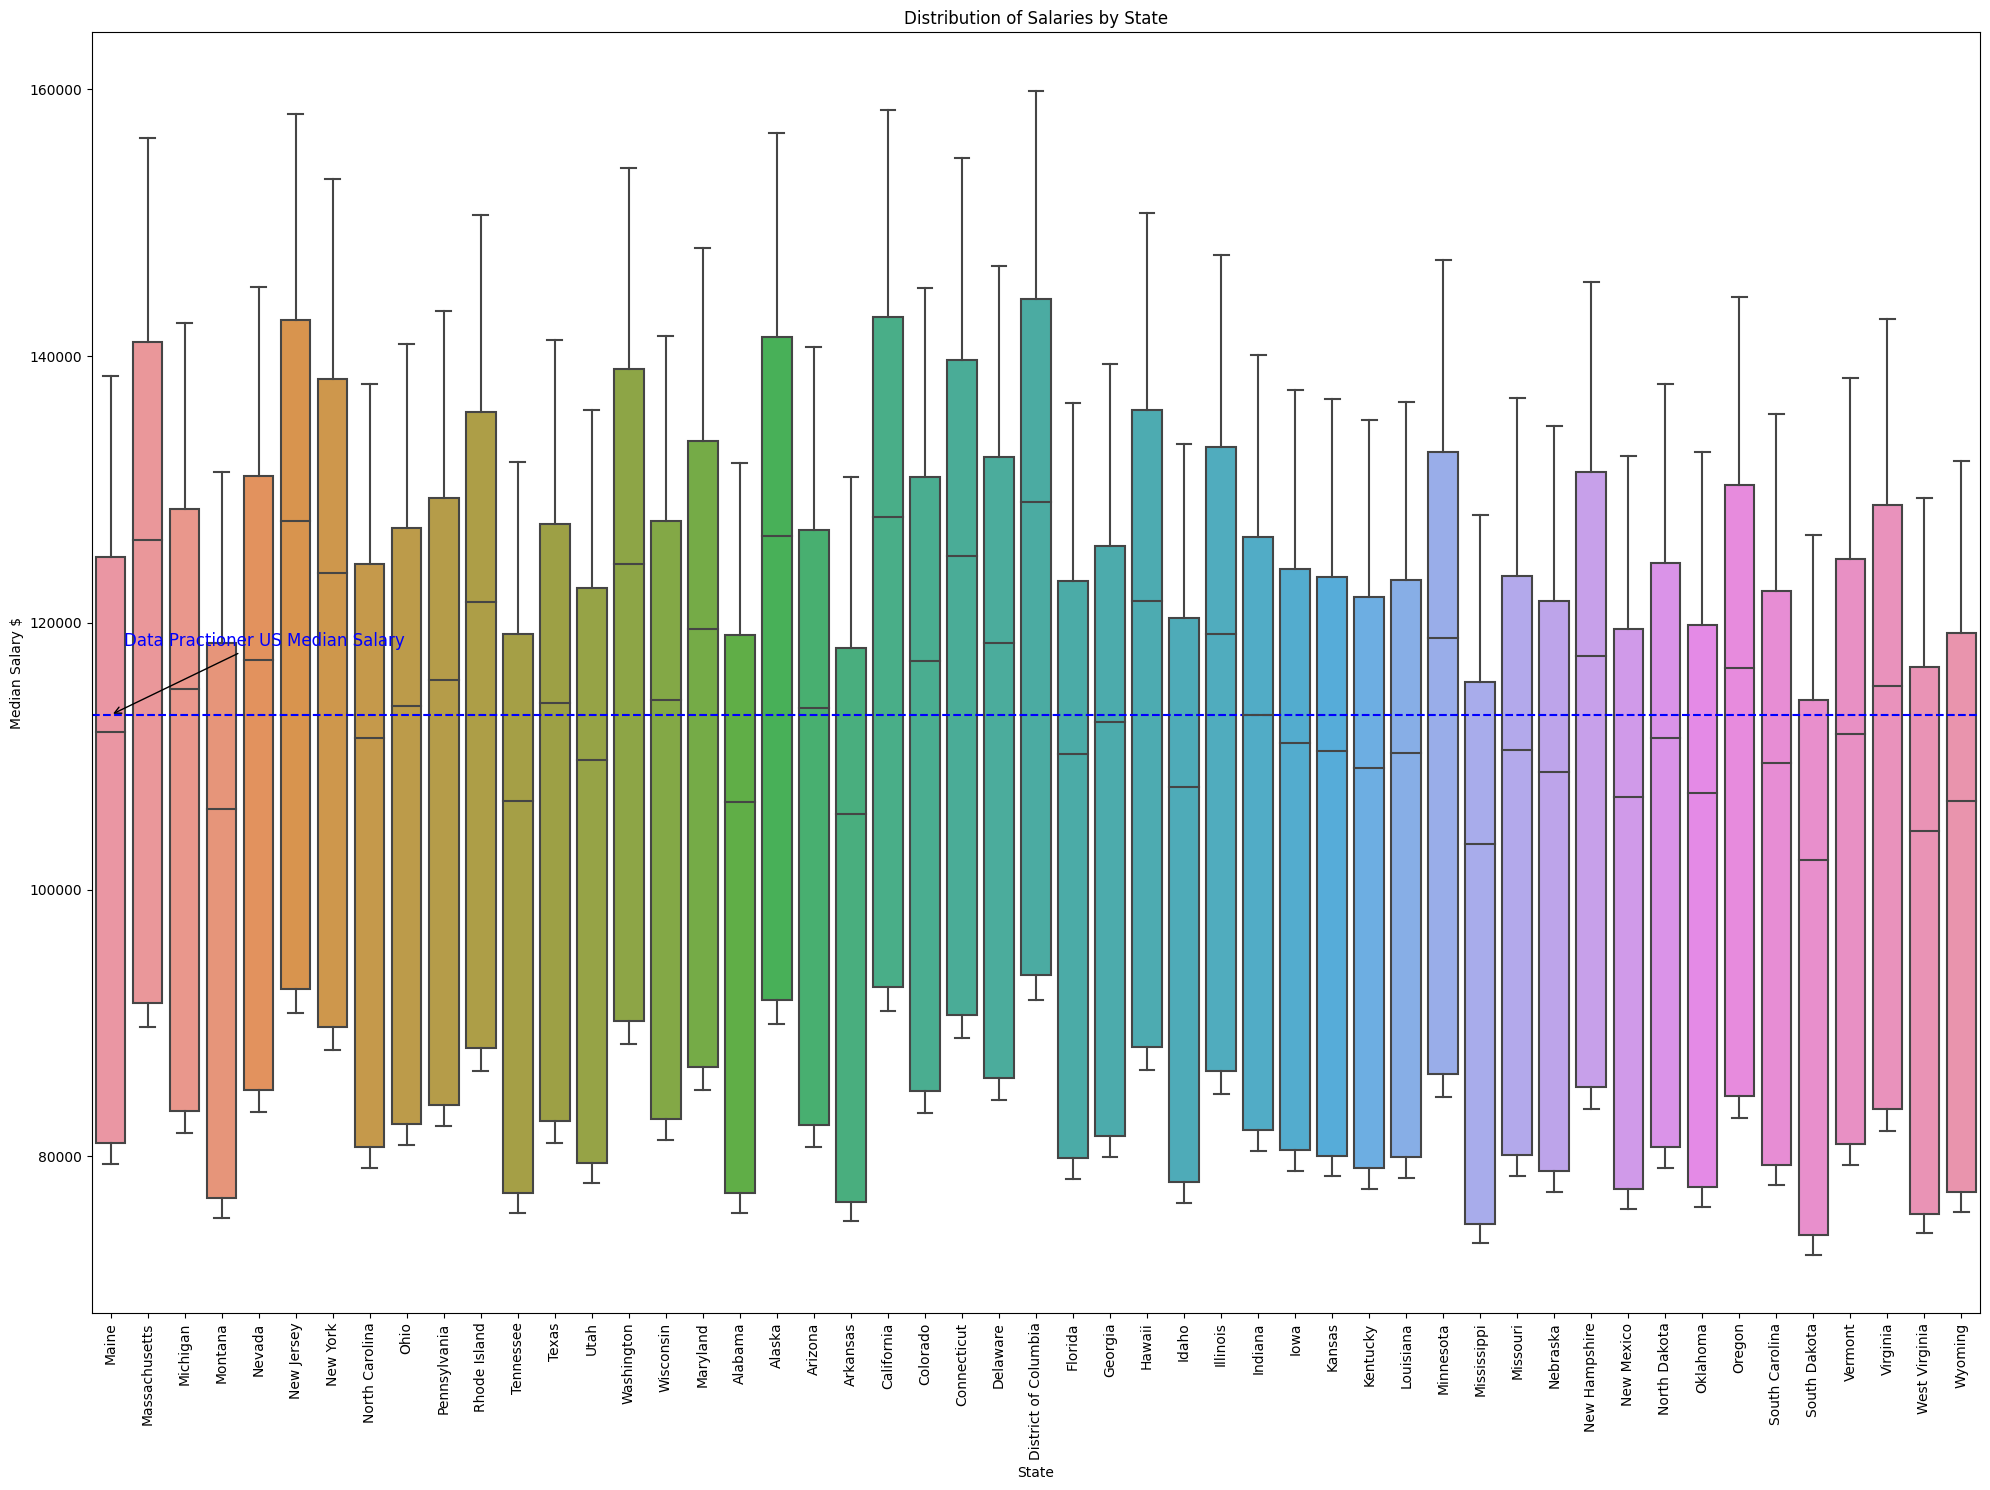

In [402]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(20, 15))
sns.boxplot(x='State', y='nTile50', data=gdf)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Median Salary $')
plt.title('Distribution of Salaries by State')


plt.axhline(y=113094, color='Blue', linestyle='--', label='Median Salary Line')

# Annotate the median salary value
plt.annotate('Data Practioner US Median Salary', xy=(0, 113094), xytext=(10, 50),
             textcoords='offset points', arrowprops={'arrowstyle': '->'}, fontsize=12, color='Blue')
plt.tight_layout()
plt.show()


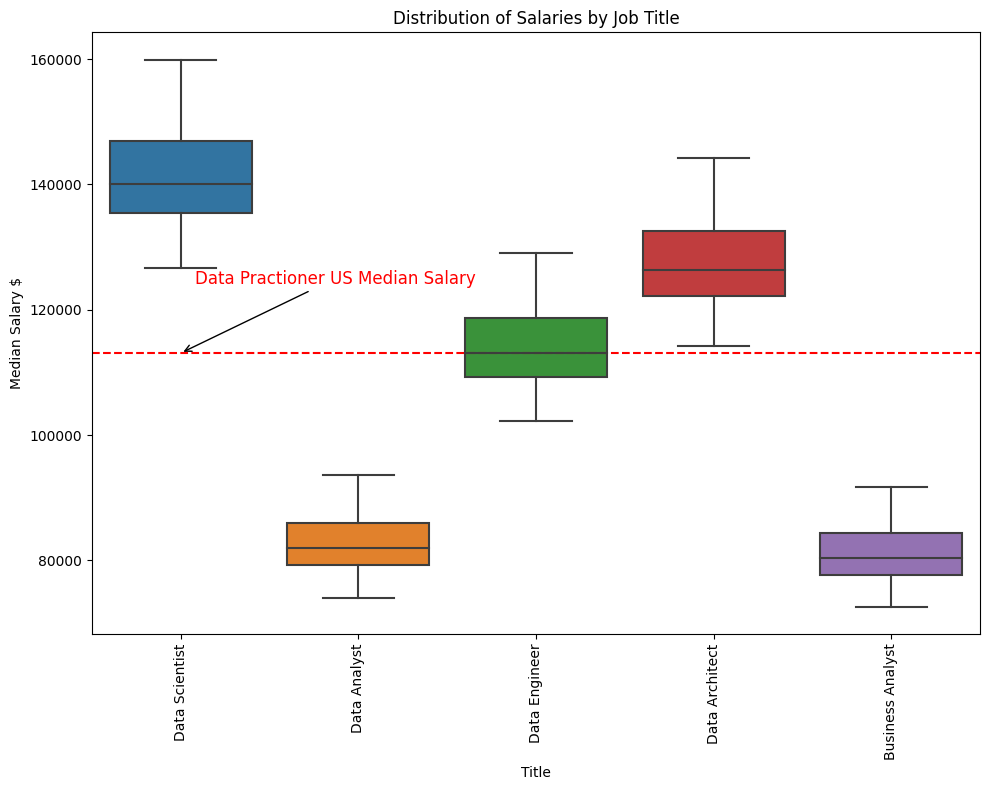

In [399]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(10, 8))
sns.boxplot(x='Title', y='nTile50', data=gdf)
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('Median Salary $')
plt.title('Distribution of Salaries by Job Title')

plt.axhline(y=113094, color='red', linestyle='--', label='Median Salary Line')

# Annotate the median salary value
plt.annotate('Data Practioner US Median Salary', xy=(0, 113094), xytext=(10, 50),
             textcoords='offset points', arrowprops={'arrowstyle': '->'}, fontsize=12, color='red')

plt.tight_layout()
plt.show()


In [53]:
mport folium

# Assuming you have a GeoDataFrame named 'gdf' with the correct column name for data

# Create a Folium map centered around a specific location
m = folium.Map(location=[40, -95], zoom_start=4)  # Adjust the center and zoom as needed

# Add the Choropleth layer to the map
folium.Choropleth(
    geo_data=gdf,
    name='Choropleth Map',
    data=gdf,
    columns=['State', 'nTile50'],  # Use the correct column name for data and legend
    key_on='feature.properties.geometry',  # Use the correct column name for GeoJSON property
    fill_color='YlGn',
).add_to(m)

# Display the interactive map
m


TypeError: ignored